In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.optimize import curve_fit

In [2]:
def get_x(N):
    return [2*random.random()-1 for i in range(N)]

In [3]:
def get_y(x):
    return [np.sin(np.pi*x_val) for x_val in x]

In [4]:
def get_alpha(x):
    x1 = x[0]
    x2 = x[1]
    return((x1*np.sin(np.pi*x1) +x2*np.sin(np.pi*x2))/(x1**2 + x2**2))

In [5]:
def get_alpha_curvefit(x, y, f_x):
    coeff, cov  = curve_fit(f_x,x,y)
    return coeff

In [6]:
def b(x,b):
    return b

In [7]:
def ax(x,a):
    return a*x

In [8]:
def ax_b(x,a,b):
    return a*x + b

In [9]:
def ax2(x,a):
    return a*x**2

In [10]:
def ax2_b(x,a,b):
    return a*x**2 + b

In [11]:
K = 1000
N = 2
xs = []
ys = []
alphas = []
for i in range(K):
    x = get_x(N)
    y = get_y(x)
    a = get_alpha(x)
    
    xs.append(x)
    ys.append(y)
    alphas.append(a)
    

In [12]:
print(np.mean(alphas))

1.40050307262


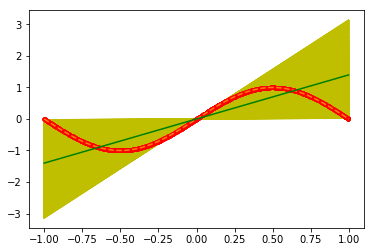

In [13]:
x = [i/float(500)-1 for i in range(1000)]
y = [np.sin(np.pi*i) for i in x]
plt.plot(x,y,'--')
plt.plot(xs,ys,'.r')
for a in alphas:
    plt.plot([i for i in x], [a*i for i in x],'y')
plt.plot(xs,ys,'.r')
plt.plot(x,y,'--')
plt.plot([i for i in x], [np.mean(alphas)*i for i in x],'g')
plt.show()

In [14]:
bias = (np.asarray(alphas).mean()*np.asarray(x) - np.sin(np.pi*np.asarray(x)))**2

In [15]:
bias.mean()

0.26221924566301741

In [16]:
var = [np.mean((a*np.asarray(x)-np.asarray(alphas).mean()*np.asarray(x))**2) for a in alphas]

In [17]:
np.mean(var)

0.2229002014308058

In [43]:
K = 100
N = 2
xs = []
ys = []
alphas = []
for i in range(K):
    x = get_x(N)
    y = get_y(x)
    a, _ = curve_fit(b,x,y)
    
    xs.append(x)
    ys.append(y)
    alphas.append(a[0])
print(len(alphas))
print(alphas[0])

100
-0.00514552733675


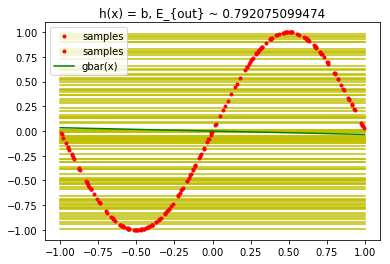

0.792075099474


In [44]:


x = [i/float(500)-1 for i in range(1000)]
y = [np.sin(np.pi*i) for i in x]
bias = (np.asarray(alphas).mean() - np.sin(np.pi*np.asarray(x)))**2
var = [np.mean((a-np.asarray(alphas).mean()*np.asarray(x))**2) for a in alphas]
for a in alphas:
    plt.plot([i for i in x], [a for i in x],'y')
plt.plot(xs,ys,'.r',label = 'samples')
plt.plot([i for i in x], [np.mean(alphas)*i for i in x],'g', label = 'gbar(x)')
plt.title('h(x) = b, E_{out} ~ '+str(bias.mean()+np.mean(var)))
plt.legend()
plt.savefig('b.jpg')
plt.show()

print(bias.mean()+np.mean(var))

0.750756892172


2.88287870346


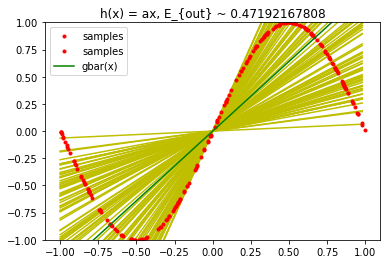

0.47192167808


In [48]:
K = 100
N = 2
xs = []
ys = []
alphas = []
for i in range(K):
    x = get_x(N)
    y = get_y(x)
    a, _ = curve_fit(ax,x,y)
    
    xs.append(x)
    ys.append(y)
    alphas.append(a[0])

x = [i/float(50)-1 for i in range(100)]
y = [np.sin(np.pi*i) for i in x]
bias = (np.asarray(alphas).mean()*np.asarray(x) - np.sin(np.pi*np.asarray(x)))**2
var = [np.mean((a*np.asarray(x)-np.asarray(alphas).mean()*np.asarray(x))**2) for a in alphas]
for a in alphas:
    plt.plot([i for i in x], [a*i for i in x],'y')
plt.plot(xs,ys,'.r',label = 'samples')
plt.plot([i for i in x], [np.mean(alphas)*i for i in x],'g', label = 'gbar(x)')
plt.ylim([-1,1])

plt.title('h(x) = ax, E_{out} ~ '+str(bias.mean()+np.mean(var)))
plt.legend()
plt.savefig('ax.jpg')
plt.show()


print(bias.mean()+np.mean(var))

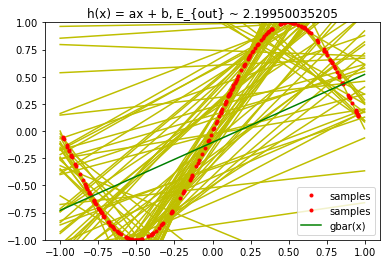

2.19950035205


In [49]:
K = 100
N = 2
xs = []
ys = []
alphas = []
for i in range(K):
    x = get_x(N)
    y = get_y(x)
    a, _ = curve_fit(ax_b,x,y)
    
    xs.append(x)
    ys.append(y)
    alphas.append(a)


x = [i/float(500)-1 for i in range(1000)]
y = [np.sin(np.pi*i) for i in x]

bias = (np.asarray([a[0] for a in alphas]).mean()*np.asarray(x) + np.mean([a[1] for a in alphas]) - np.sin(np.pi*np.asarray(x)))**2
var = [np.mean((a[0]*np.asarray(x) + a[1] -np.asarray([a[0] for a in alphas]).mean()*np.asarray(x) + np.mean([a[1] for a in alphas]))**2) for a in alphas]

for a in alphas:
    plt.plot([i for i in x], [a[0]*i+a[1] for i in x],'y')
plt.plot(xs,ys,'.r', label = 'samples')
plt.plot([i for i in x], [np.mean([a[0] for a in alphas])*i +np.mean([a[1] for a in alphas]) for i in x],'g',label = 'gbar(x)')
plt.ylim([-1,1])

plt.title('h(x) = ax + b, E_{out} ~ '+str(bias.mean()+np.mean(var)))
plt.legend()
plt.savefig('ax_b.jpg')
plt.show()

print(np.mean(var)+ bias.mean())



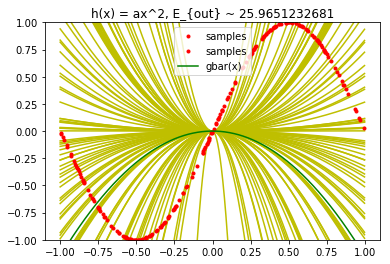

25.9651232681


In [50]:
K = 100
N = 2
xs = []
ys = []
alphas = []
for i in range(K):
    x = get_x(N)
    y = get_y(x)
    a, _ = curve_fit(ax2,x,y)
    
    xs.append(x)
    ys.append(y)
    alphas.append(a)


x = [i/float(500)-1 for i in range(1000)]
y = [np.sin(np.pi*i) for i in x]

bias = (np.asarray([a[0] for a in alphas]).mean()*np.asarray(x)**2 - np.sin(np.pi*np.asarray(x)))**2
var = [np.mean((a[0]*np.asarray(x)**2 -np.asarray([a[0] for a in alphas]).mean()*np.asarray(x)**2)**2) for a in alphas]

for a in alphas:
    plt.plot([i for i in x], [a[0]*i**2 for i in x],'y')
plt.plot(xs,ys,'.r', label = 'samples')
plt.plot([i for i in x], [np.mean([a[0] for a in alphas])*i**2 for i in x],'g', label = 'gbar(x)')
plt.ylim([-1,1])
plt.title('h(x) = ax^2, E_{out} ~ '+str(bias.mean()+np.mean(var)))
plt.legend()
plt.savefig('ax2.jpg')
plt.show()

print(np.mean(var)+ bias.mean())

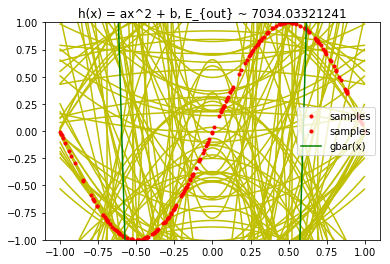

7034.03321241


In [51]:
K = 100
N = 2
xs = []
ys = []
alphas = []
for i in range(K):
    x = get_x(N)
    y = get_y(x)
    a, _ = curve_fit(ax2_b,x,y)
    
    xs.append(x)
    ys.append(y)
    alphas.append(a)


x = [i/float(500)-1 for i in range(1000)]
y = [np.sin(np.pi*i) for i in x]

bias = (np.asarray([a[0] for a in alphas]).mean()*np.asarray(x)**2 + np.mean([a[1] for a in alphas]) - np.sin(np.pi*np.asarray(x)))**2
var = [np.mean((a[0]*np.asarray(x)**2 + a[1] -np.asarray([a[0] for a in alphas]).mean()*np.asarray(x)**2 + np.mean([a[1] for a in alphas]))**2) for a in alphas]

for a in alphas:
    plt.plot([i for i in x], [a[0]*i**2+a[1] for i in x],'y')
plt.plot(xs,ys,'.r', label = 'samples')
plt.plot([i for i in x], [np.mean([a[0] for a in alphas])*i**2 +np.mean([a[1] for a in alphas]) for i in x],'g', label = 'gbar(x)')
plt.ylim([-1,1])
plt.title('h(x) = ax^2 + b, E_{out} ~ '+str(bias.mean()+np.mean(var)))
plt.legend()
plt.savefig('ax2_b.jpg')
plt.show()

print(np.mean(var)+ bias.mean())


